# Exercise 8 - Solutions

###  1: $R^2$ without categorical variables
#### a) 
$$
R^2 \sim \textrm{Beta}\left(\frac{K-1}{2},\frac{n-K}{2}\right)
$$

$K$ is the number of categories and $n$ is the sample size. Thus, in our example we have:

$$
R^2 \sim \textrm{Beta}\left(\frac{10-1}{2},\frac{100-10}{2}\right)
$$

$$
R^2 \sim \textrm{Beta}\left(4.5,45\right)
$$

#### b)

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

# set the seed
rng = np.random.default_rng(seed = 313)

# simulate data and set parameter values
n = 100
K = 10
n_reps = 10**4
x = sm.add_constant(rng.normal(0, 1, (n, K)))
y = rng.normal(0, 1, (n_reps, n))
# What's x in this case?
x

array([[ 1.        , -0.10476825,  1.200623  , ..., -1.41062541,
         0.21075197,  1.2063209 ],
       [ 1.        , -0.21589238,  0.96266991, ..., -0.36334591,
        -0.79925663, -0.85709784],
       [ 1.        ,  1.57469391, -1.13584913, ...,  0.20837467,
         0.15460931,  1.05707782],
       ...,
       [ 1.        , -1.02236039,  1.25271022, ..., -0.5335641 ,
        -1.39146252, -0.60010705],
       [ 1.        ,  0.20377649, -0.06238182, ...,  0.56699777,
        -0.80739432,  0.055514  ],
       [ 1.        , -1.56863791, -0.36914888, ..., -0.4010826 ,
         0.69200444, -0.94896641]])

Adjusting the function from the lecture:

In [2]:
def func1d(y,x):
    # fit OLS regression; this is equivalent to using formulas and putting x into an array.
    fit = sm.OLS(y, x).fit()
    return fit.rsquared


# apply function for all n_reps
rsqs = np.apply_along_axis(func1d = func1d, axis = 1, arr = y, x = x)


Plot the results:

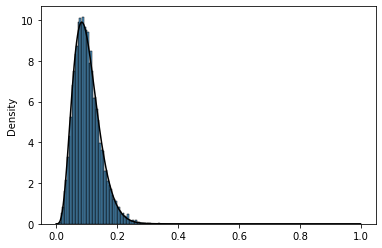

In [3]:
fig, ax = plt.subplots()

# plot the historgram of R2 values, with superimposed theoretical distribution
# We have K + 1 predictors, hence the theoretical distribution is
xs = np.arange(0, 1, 0.001)
sns.histplot(ax=ax,x = rsqs, stat = "density")
ax.plot(xs, stats.beta.pdf(xs, (K)/2, (n - K - 1)/2), color = "black")
plt.show()

#### c)

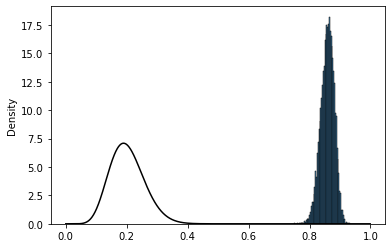

In [4]:
# simulate data and set parameter values
n = 100
K = 20
n_reps = 10**4
x = sm.add_constant(rng.normal(0, 1, (n, K)))
y = 1 + 2*x[:,1]+ rng.normal(0, 1, (n_reps, n))

# apply function for all n_reps
rsqs = np.apply_along_axis(func1d = func1d, axis = 1, arr = y, x = x)

# create figure
fig, ax = plt.subplots()

# plot the historgram of R2 values, with superimposed theoretical distribution
sns.histplot(ax=ax,x = rsqs, stat = "density")
ax.plot(xs, stats.beta.pdf(xs, (K)/2, (n - K - 1)/2), color = "black")
plt.show()

The simulated data should only align with the theoretical distribution, if the $H_0$ is true, i.e. when the independent variables do not explain $y$. If the $H_0$ is wrong, the distribution of $R^2$ is far from the theoretical one. This forms the basis for the statistical test. The smaller the probability mass of simulated draws under the theoretical $H_0$, the greater the evidence against the $H_0$. 

### 2: $R^2$ and $F$

#### a)
We have that:
$$
F(x) = \frac{n-K}{K-1}\frac{x}{1-x},
$$

The inverse function can be derived by exchanging $y$ and $x$ and solving the above equation for $y$:

$$
x = \frac{n-K}{K-1}\frac{y}{1-y}
$$

$$
x \frac{K-1}{n-K}= \frac{y}{1-y}$$

$$
 \frac{n-K}{x(K-1)} = \frac{1-y}{y}
$$


$$
\frac{(n-K)+x(K-1)}{x(K-1)} = \frac{1}{y}
$$

$$
y = \frac{x(K-1)}{(n-K)+x(K-1)} \:\: or \:\: \frac{x}{\frac{(n-K)}{(K-1)}+x}
$$

to validate that the $F^{-1}(F(x))=x$ holds, we can simply plug $F(x)$ into our above expression and simplify:

$$
y = \frac{\frac{n-K}{K-1}\frac{x}{1-x}(K-1)}{(n-K)+\frac{n-K}{K-1}\frac{x}{1-x}(K-1)} 
$$

$$
y = \frac{(n-K)\frac{x}{1-x}}{(n-K)+(n-K)\frac{x}{1-x}} 
$$

$$
y = \frac{\frac{x}{1-x}}{1+\frac{x}{1-x}} 
$$

$$
y = \frac{\frac{x}{1-x}}{\frac{1-x}{1-x}+\frac{x}{1-x}} = x
$$

#### b)

To answer b), we can simply use the inverse function that we derived above:


In [5]:
def f_inv(F,n,k):
    
    a = (n-k)/(k-1)
    
    return F/(a+F)

The $R^2$ is given by:

In [6]:
n = 100
K = 6
F = 230

f_inv(F,n,K)

0.9244372990353698

#### c)

For $R^2$ = 0.

### 3: Simulating with different errors
#### a) Simulation Function

In [7]:
def rsq_sim(n, x, n_reps, error):
    
    # preallocate array
    rs_ = np.zeros([n_reps,1])
    
    # simulate data and run regression
    for i in range(n_reps):
        
        # simulate data given x
        residuals = error(n)
        y = residuals
        
        # run regression
        reg = sm.OLS(y, x)
        reg_ = reg.fit()
        
        # save r2
        rs_[i] = reg_.rsquared
        
        # retunr r2
    return rs_
    

#### b) Trying out error terms
Generate $x$: 

In [8]:
n = 20
K = 6
n_reps = 10000

# generate x
x = sm.add_constant(rng.normal(0, 1,[n,K]))

Run the simulation for different error functions:

In [9]:
# set a seed
np.random.default_rng(seed = 313)

# call the function for various error distributions
normal = rsq_sim(n, x, n_reps, lambda n: rng.normal(0, 1, n))
exponential = rsq_sim(n, x, n_reps, lambda n: rng.exponential(1, n))
geometric = rsq_sim(n, x, n_reps, lambda n: rng.geometric(0.5, n))
standard_t = rsq_sim(n, x, n_reps, lambda n: rng.standard_t(3, n))

#### c) Plotting

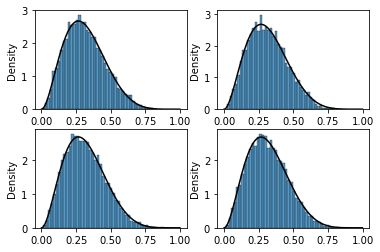

In [10]:
# create figure
fig,ax = plt.subplots(2,2)
xs = np.arange(0, 1, 0.001)

# plot for normal errors
sns.histplot(ax=ax[0,0],x = normal.flatten(), stat = "density")
ax[0,0].plot(xs, stats.beta.pdf(xs, (K)/2, (n-K-1)/2), color = "black")

# plot for exponential errors
sns.histplot(ax=ax[0,1],x = exponential.flatten(), stat = "density")
ax[0,1].plot(xs, stats.beta.pdf(xs, (K)/2, (n-K-1)/2), color = "black")

# plot for geometric errors
sns.histplot(ax=ax[1,0],x = geometric.flatten(), stat = "density")
ax[1,0].plot(xs, stats.beta.pdf(xs, (K)/2, (n-K-1)/2), color = "black")

# plot for standard-t errors
sns.histplot(ax=ax[1,1],x = standard_t.flatten(), stat = "density")
ax[1,1].plot(xs, stats.beta.pdf(xs, (K)/2, (n-K-1)/2), color = "black")

plt.show()

Non-normal errors have barely any effect on the distribution of $R^2$.